In [ ]:
# !pip install docx2txt
# !pip install pdfplumber
# !sudo apt install tesseract-ocr
# !pip install pytesseract

In [ ]:
import io
import os
import pandas as pd
import docx2txt
from itertools import chain
import pdfplumber
import pytesseract
from PIL import Image
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def file_to_text(file_path):

    _, file_extension = os.path.splitext(file_path)

    if file_extension == ".docx":
        text = docx2txt.process(file_path).replace("\n","")
        return text

    elif file_extension == ".pdf":
      text = ""
      with pdfplumber.open(file_path) as pdf:
        num_pages = len(pdf.pages)
        for i in range(num_pages):
          page_content = pdf.pages[i].extract_text().replace("\n","")
          text += " "+page_content
      return text

    elif file_extension == ".txt":
      with open(file_path, "r") as f:
        text = f.read()
        text = text.replace("\n","")
      f.close()
      return text

    elif file_extension == ".JPG" or file_extension == ".JPEG" or file_extension == ".PNG":
      image = Image.open(file_path)
      text = pytesseract.image_to_string(image)
      text = text.replace("\n","")
      return text

    else:
      print("Unsupported Format.")

In [ ]:
job_description = files.upload()
if job_description:
  job_description_path = "/content/" + next(iter(job_description))
  job_description = file_to_text(job_description_path)

In [ ]:
resumes = files.upload()


In [ ]:
resume_names = []
similarities = [] # Range between 0 (0%) and 1 (100%)

# Save uploaded resumes' names in a list 
for item in chain(resumes.items()):
  resume_name = next(iter(item))
  resume_names.append(resume_name)

# Convert resumes to text and do a pairwise comparison with job description
cv = CountVectorizer()
for name in resume_names:
  path = "/content/" + name
  resume = file_to_text(path)
  content = [job_description, resume] 
  matrix = cv.fit_transform(content)
  similarity_matrix = cosine_similarity(matrix)
  similarity = round(similarity_matrix[0][1],2)
  similarities.append(similarity)

# Display cosine similarities in a dataframe
ats_data = {"Applicant File": resume_names, "Similarity With Job Description": similarities}  
ats_data = pd.DataFrame(ats_data)  
ats_data.sort_values(by="Similarity With Job Description", ascending=True, inplace=True)
print(ats_data)  

# Store cosine similarities in Excel file
ats_data.to_excel("ATS Results.xlsx")

In [ ]:
resume_text = "Teaching Assistant at Coding Ninjas – Data Structures in C++ Jan 2021 – Apr 2021  Solved doubts of 50+ students related to data structures and learned to identify logical, syntax and runtime errorsand improved my coding speedDebugged student codes in C++ and took online doubt solving sessions Teaching Assistant at Coding Ninjas – Data Structures in C++ \n\n Jan 2022 – Apr 2022 Solved doubts of 50+ students related to data structures and learned to identify logical, syntax and runtime errorsand improved my coding speedDebugged student codes in C++ and took online doubt solving sessions"

In [ ]:
lens = len(resume_text)

In [ ]:
a,b = resume_text.split('\n\n')

In [ ]:
print(a)

In [ ]:
print(b)

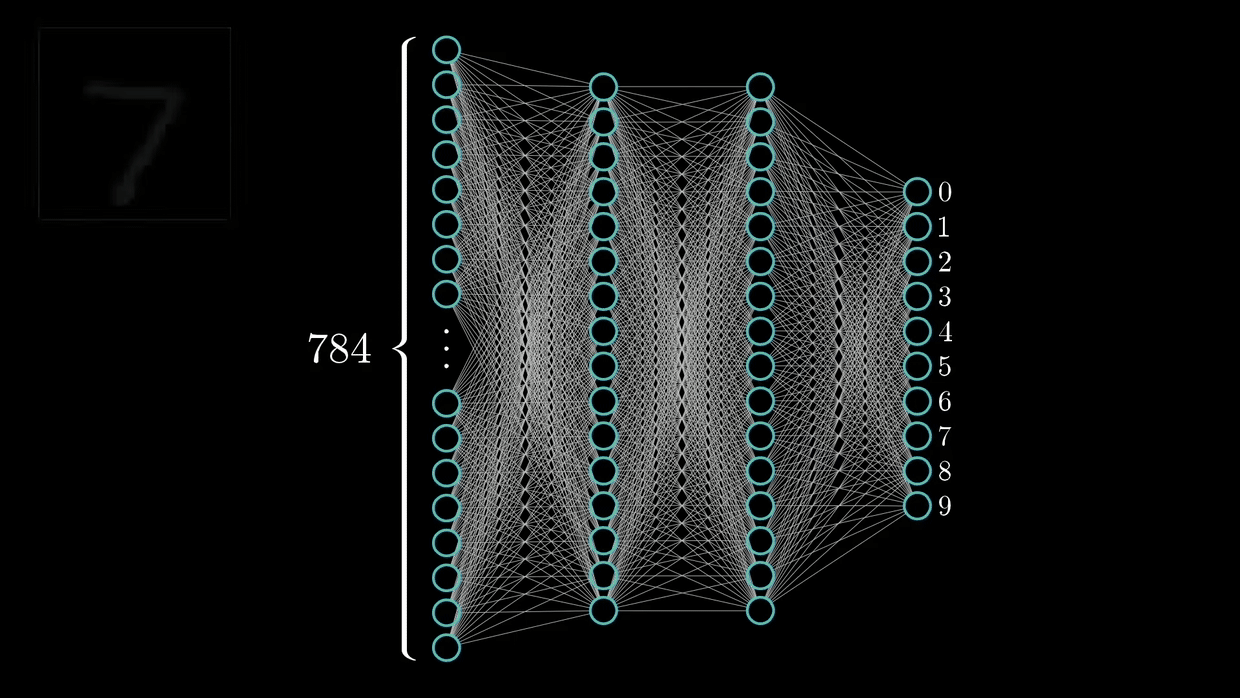

In [ ]:
resume_names = []
similarities = [] # Range between 0 (0%) and 1 (100%)

# Save uploaded resumes' names in a list 
for item in chain(resumes.items()):
  resume_name = next(iter(item))
  resume_names.append(resume_name)

# Convert resumes to text and do a pairwise comparison with job description
cv = CountVectorizer()
for name in resume_names:
  path = "/content/" + name
  resume = file_to_text(path)
  content = [job_description, resume] 
  matrix = cv.fit_transform(content)
  similarity_matrix = cosine_similarity(matrix)
  similarity = round(similarity_matrix[0][1],2)
  similarities.append(similarity)

# Display cosine similarities in a dataframe
ats_data = {"Applicant File": resume_names, "Similarity With Job Description": similarities}  
ats_data = pd.DataFrame(ats_data)  
ats_data.sort_values(by="Similarity With Job Description", ascending=True, inplace=True)
print(ats_data)  

# Store cosine similarities in Excel file
# ats_data.to_excel("ATS Results.xlsx")

In [ ]:
def convert(similarities):
      
    # Converting integer list to string list
    s = [str(i) for i in similarities]
      
    # Join list items using join()
    res = float("".join(s))
      
    return(res)
  
# Driver code

answer = convert(similarities)

In [ ]:
if(answer>0.4):
  print("relevant")
else:
  print('Irrelevant')
